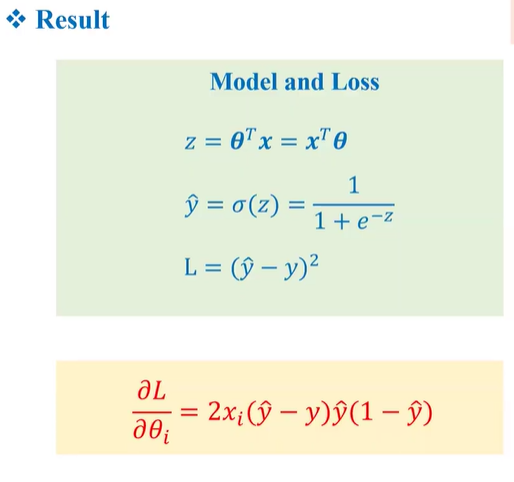

In [252]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(r'E:\AIO\From_Linear_Regression_To_Logistic_Regression\Data\iris_1D.csv',
                        delimiter=',',
                        skip_header=1)

X = iris[:, :1]
y = iris[:, 1]
N = 6

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

#shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X.shape)
print(y.shape)

(6, 2)
(6,)


In [253]:
X

array([[1. , 3. ],
       [1. , 1.4],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 4.1],
       [1. , 3.8]])

In [254]:
y

array([1., 0., 0., 0., 1., 1.])

In [255]:
def sigmod_function(z):
    return 1 / (1 + np.exp(-z))

def predict(x, theta):
    y_hat = sigmod_function(np.dot(x, theta))
    return y_hat

def loss_function(y_hat, y):
    return (y_hat - y)**2

def compute_gradient(x, y_hat, y):
    return 2*x*(y_hat - y)*y_hat*(1 - y_hat)

def update_weights(gradient, theta, lr):
    return theta - gradient*lr

In [256]:
lr = 0.31
num_epoch = 5000
theta = np.array([0.1, 5])

In [257]:
losses = []
accs = []

for _ in range(num_epoch):

    #for each sample
    for i in range(N):

        #get a sample
        xi = X[i]
        yi = y[i]

        #predict 
        y_hat = predict(xi, theta)
        print(y_hat)

        #compute loss
        loss = loss_function(y_hat, yi)
        losses.append(loss) # debug

        #compute gradient
        gradient = compute_gradient(xi, y_hat, yi)

        #update weights
        theta = update_weights(gradient, theta, lr)

    #accuarancy for training
    preds = predict(X, theta).round()
    acc = (preds == y).mean()
    accs.append(acc)


0.9999997232082107
0.9991755753136019
0.9939328174449868
0.999494333651073
0.9999999988406065
0.9999999948115923
0.9999997178309713
0.9991661308539204
0.993875539194791
0.999488234831282
0.9999999988114059
0.9999999946888076
0.9999997122946944
0.9991564837893903
0.9938171518830385
0.9994820008719341
0.9999999987811679
0.9999999945618503
0.9999997065930349
0.9991466277155542
0.9937576228495064
0.9994756273918937
0.9999999987498445
0.9999999944305344
0.9999997007193285
0.9991365559593588
0.9936969181372698
0.9994691098222815
0.9999999987173853
0.9999999942946645
0.999999694666571
0.9991262615650683
0.9936350024276925
0.9994624433964344
0.9999999986837369
0.9999999941540334
0.9999996884273987
0.9991157372792864
0.9935718389714651
0.9994556231392225
0.999999998648843
0.999999994008423
0.9999996819940647
0.9991049755350253
0.9935073895154137
0.9994486438556713
0.9999999986126435
0.9999999938576021
0.9999996753584154
0.9990939684347462
0.9934416142247696
0.9994415001188369
0.9999999985750754

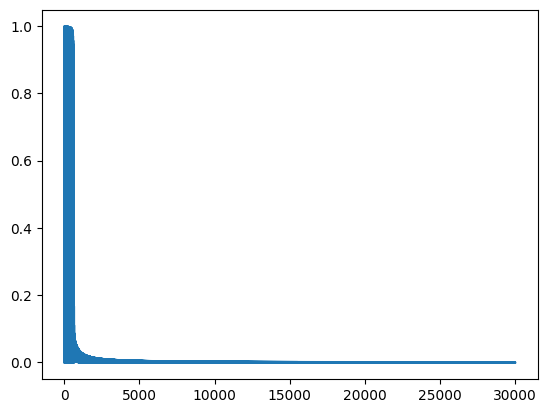

In [258]:
plt.plot(losses)
plt.show()

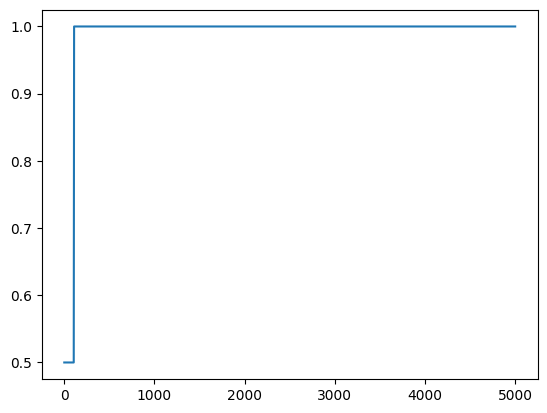

In [259]:
plt.plot(accs)
plt.show()

In [260]:
preds = predict(X, theta).round()
print(preds)
print(y)

[1. 0. 0. 0. 1. 1.]
[1. 0. 0. 0. 1. 1.]
